In [1]:
using Revise
using SSMCMain, SSMCMain.BasicMiCRM, MLSolver

In [2]:
using CairoMakie, ProgressLogging

[ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]


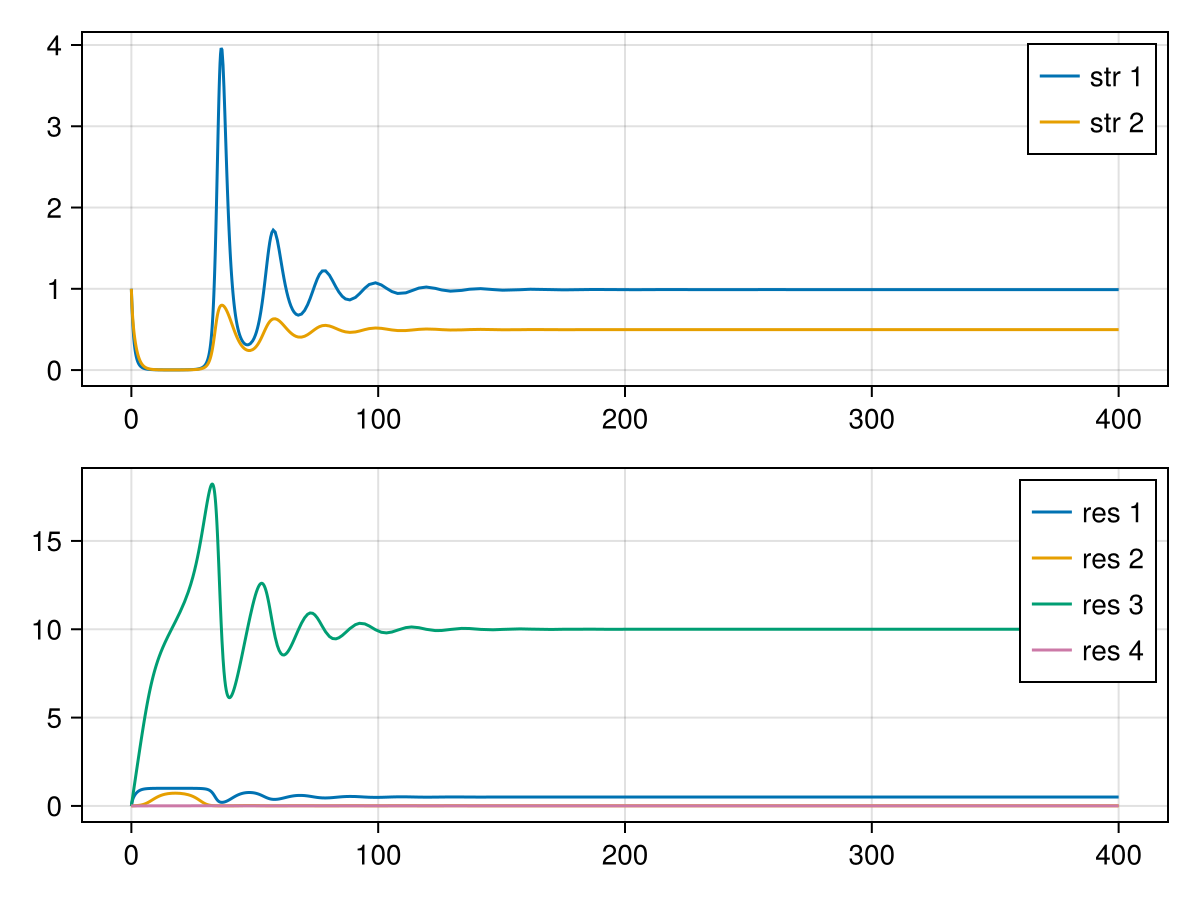

2×4 SMatrix{2, 4, Float64, 8} with indices SOneTo(2)×SOneTo(4):
 1.0    0.0  0.1    0.0
 0.0  200.0  0.0  200.0

4×4 SMatrix{4, 4, Float64, 16} with indices SOneTo(4)×SOneTo(4):
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0

6-element Vector{Float64}:
 0.9900489726220588
 0.497499976311341
 0.5025000236642606
 0.009950249157294895
 9.999986962744895
 0.004999996537717635

In [128]:
p, s = make_solve_plot_return(2,4,400;
    D=[0. 0. 0. 0.; 0. 0. 0. 0.; 0. 1. 0. 0.; 1. 0. 0. 0.],
    K=[1., 1., 0., 0.],
    r=[1., 1., 0., 0.],
    l=[1., 1., 0., 0.],
    c=[1. 0. 0.1 0.; 0. 200. 0. 200.],
    m=[1., 1.],
    u0=[1., 1., 0., 0., 0., 0.],
    u0rand=0.
)
display(p.p.c)
display(p.p.D)
display(s.u[end])

In [129]:
symbolic_solve_ode_ml(p)

┌ Warning: Solve::ratnz: Solve was unable to solve the system with inexact coefficients.
│     The answer was obtained by solving a corresponding exact system and
│     numericizing the result.
└ @ MathLink ~/.julia/packages/MathLink/S39uA/src/eval.jl:16
┌ Warning: Solve::svars: Equations may not give solutions for all "solve" variables.
└ @ MathLink ~/.julia/packages/MathLink/S39uA/src/eval.jl:16


5-element Vector{Vector{Pair{Symbolics.Num, Symbolics.Num}}}:
 [u1 => 0.0, u2 => 0.0, u3 => 1.0, u4 => 1.0]
 [u1 => 0.0, u2 => 0.0, u3 => 1.0, u4 => 1.0, u6 => 0.005]
 [u1 => 0.0, u2 => 0.0, u3 => 1.0, u4 => 1.0, u5 => 10.0]
 [u1 => 0.0, u2 => 0.0, u3 => 1.0, u4 => 1.0, u5 => 10.0, u6 => 0.005]
 [u1 => 0.9900497512437811, u2 => 0.4975, u3 => 0.5025, u4 => 0.009950248756218905, u5 => 10.0, u6 => 0.005]

In [130]:
sssol = solve(SteadyStateProblem(p), DynamicSS())

retcode: Success
u: 6-element Vector{Float64}:
 0.9900625771827913
 0.49750410537756545
 0.5024958986829423
 0.009950167125868799
 9.999926613762053
 0.0049999827287360256

In [81]:
sssol = solve(SteadyStateProblem(p), SSRootfind(GaussNewton()); abstol=1e-18)

retcode: Stalled
u: 6-element Vector{Float64}:
 0.36363636363636365
 0.28571428571428575
 0.7142857142857143
 0.6363636363636364
 1.0
 0.5

In [82]:
uninplace(micrmfunc!)(sssol.u, p.p, 0)

6-element Vector{Float64}:
  0.0
  0.0
 -5.551115123125783e-17
 -5.551115123125783e-17
  5.551115123125783e-17
  0.0

maximum(real(lambdas)) = -2.1459482842031696e-6


[ Info: we are getting non-zero imaginary parts, max is 0.868545
[ Info: we are getting non-zero imaginary parts, max is 0.866878
[ Info: we are getting non-zero imaginary parts, max is 0.327946


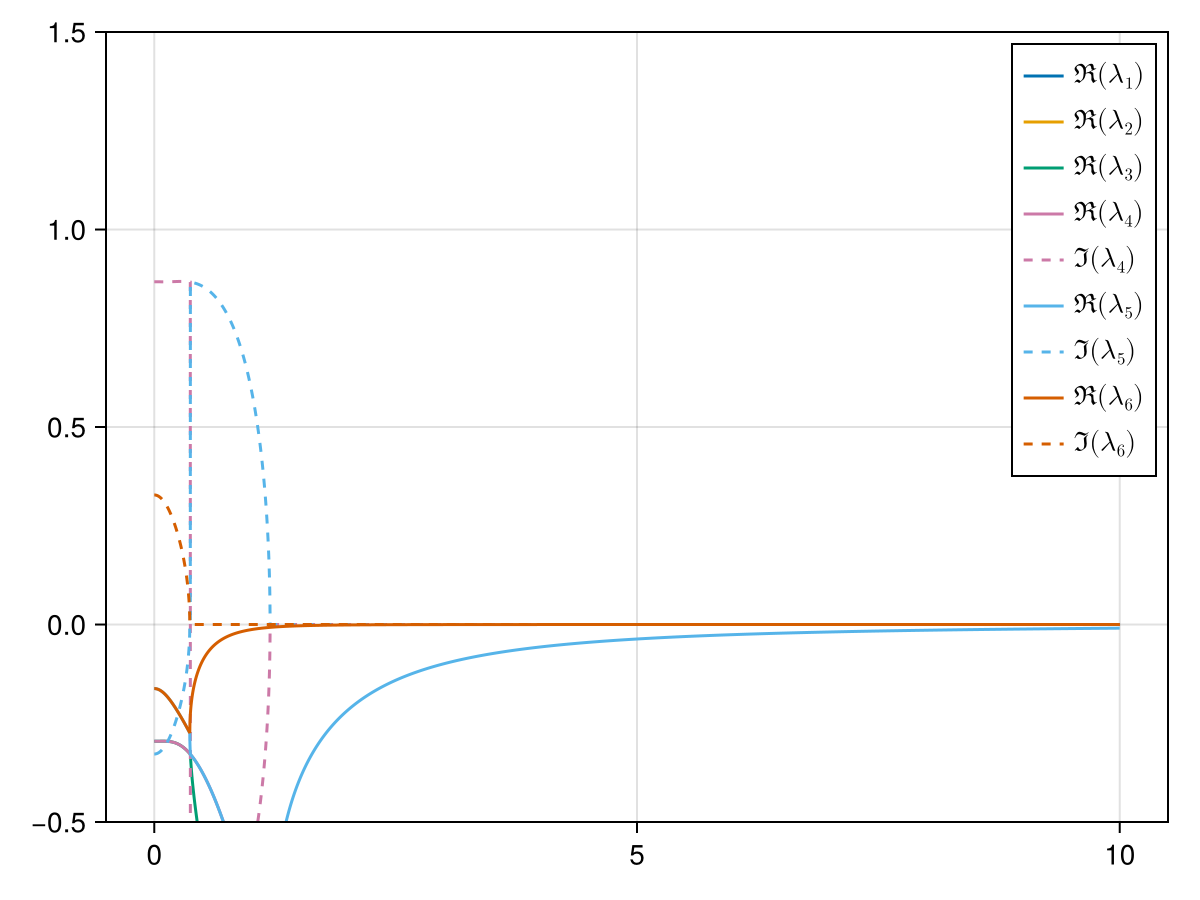

In [83]:
ks = LinRange(0., 10., 10000)
lambdas = do_linstab_for_ks(ks, p, [0., 0., 10., 10., 1., 1.], sssol.u);
@show maximum(real(lambdas))
faa = plot_linstab_lambdas(ks, lambdas)
ylims!(faa.axis, (-0.5, 1.5))
faa